In [1]:
import pandas as pd

dataTreino = pd.read_csv('Train.csv')
dataTeste = pd.read_csv('Test.csv')

## Tratamento dos dados:

In [2]:
dataTreino.shape

(45211, 17)

In [3]:
dataTeste.shape

(4521, 17)

In [4]:
dataTreino.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
dataTeste.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Não temos valores nulos tanto nos dados de treino como nos de teste

In [6]:
duplicados = dataTreino.duplicated()
dataTreino[duplicados]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


### Nao temos valores duplicados

In [7]:
dataTreino.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [8]:
dataTreino.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
dataTreino[['job', 'marital', 'education', 'loan' ,'default', 'housing', 'contact', 'month', 'poutcome', 'y']].describe()

,job,marital,education,loan,default,housing,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,no,yes,cellular,may,unknown,no
freq,9732,27214,23202,37967,44396,25130,29285,13766,36959,39922


#### y (sim ou nao) - Um depósito a prazo é um tipo de investimento oferecido por bancos, onde você deposita uma quantia de dinheiro por um período fixo de tempo (o "prazo") em troca de uma taxa de juros acordada. Durante o período do depósito, o dinheiro fica bloqueado e não pode ser retirado sem penalidades (ou com condições específicas), mas em troca, você recebe juros sobre o valor depositado.

### observando algumas estatisticas importantes de cada variavel

In [10]:
dataTreino['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [11]:
dataTreino.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
meses_ordenados = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
dataTreino['month'] = pd.Categorical(dataTreino['month'], categories=meses_ordenados, ordered=True)

#### vamos usar o labelencoder antes de explorar melhor as variaveis

## Analise Exploratoria dos Dados (EDA)

In [13]:
import seaborn as sns
import matplotlib.pyplot as pl
import numpy as np
import warnings
warnings.filterwarnings('ignore')

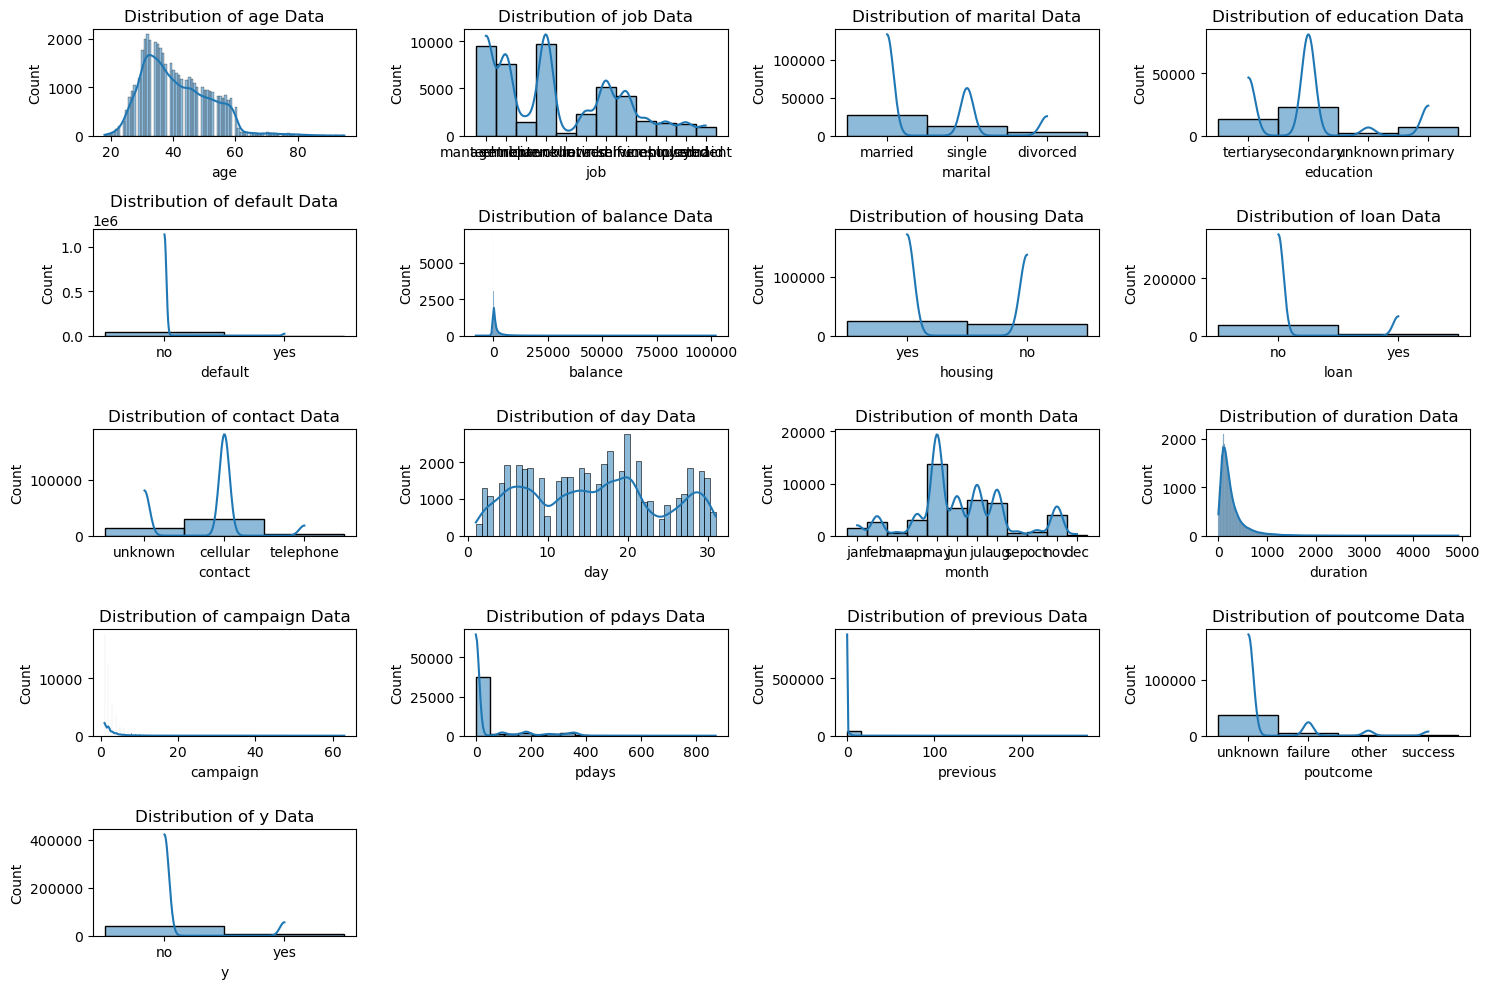

In [14]:
#vou selecionar algumas variaveis para vizualizar suas destribuições

pl.figure(figsize=(15,10))
for i,col in enumerate(dataTreino.columns,1):
    pl.subplot(5,4,i)
    pl.title(f"Distribution of {col} Data")
    sns.histplot(dataTreino[col],kde=True)
    pl.tight_layout()
    pl.plot()

#### analisando a distribuição dos dados me preocupa a grande diferença entre as classes, podendo causar uma tendencia no modelo


#### percebemos a grande diferença de quantidade entre sim :1 e não: 0, por isso temos que dar alguma alternativa tanto na hora de treinar o modelo quanto na compração dos graficos.

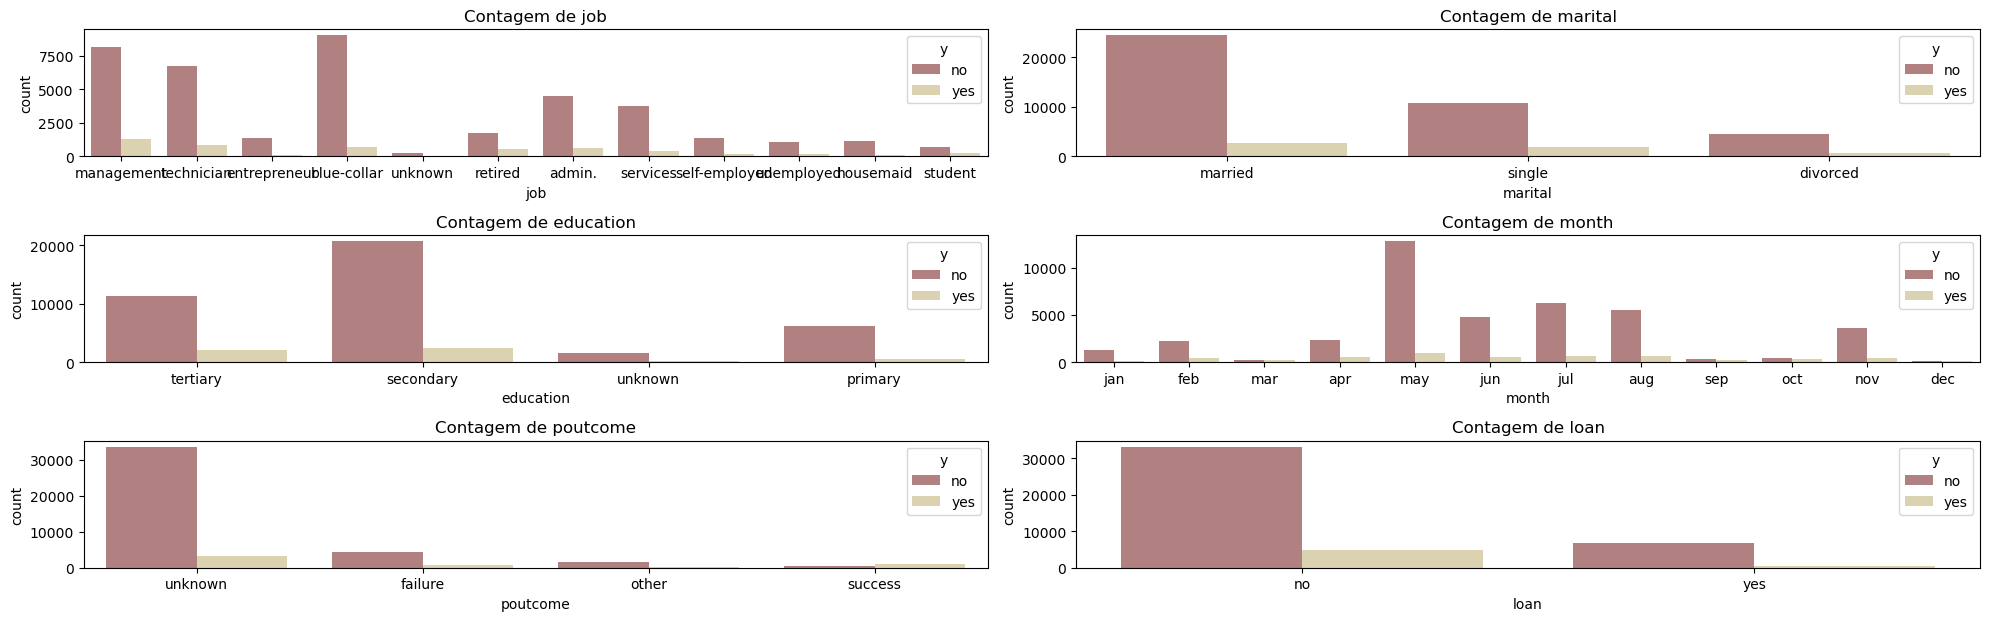

In [15]:
colunasplot = ['job', 'marital', 'education', 'month', 'poutcome', 'loan']
categoria = dataTreino['y']
pl.figure(figsize=(20,10))
for i, col in enumerate(colunasplot, 1):
    pl.subplot(5, 2, i)
    pl.title(f"Contagem de {col}")
    sns.countplot(x=dataTreino[col], hue = categoria , palette="pink")
    pl.tight_layout()

pl.show()

#### apesar da maior parte dos dados ser de maio, percebemos estatisticamente mais adesao ao deposito em julho/agosto

#### tambem podemos perceber que pessoas com maior nivel escolar tendem a aderir mais 

#### algumas profissoes tambem tendem a aderir mais, porem o mais curioso é que os aposentados proporcionalmente tendem a dizer sim muito mais

#### podemos analiser quais classes de cada caracteristicas sao mais propensas a pegar o deposito, mesmo sendo proporcionalmente muito diferente

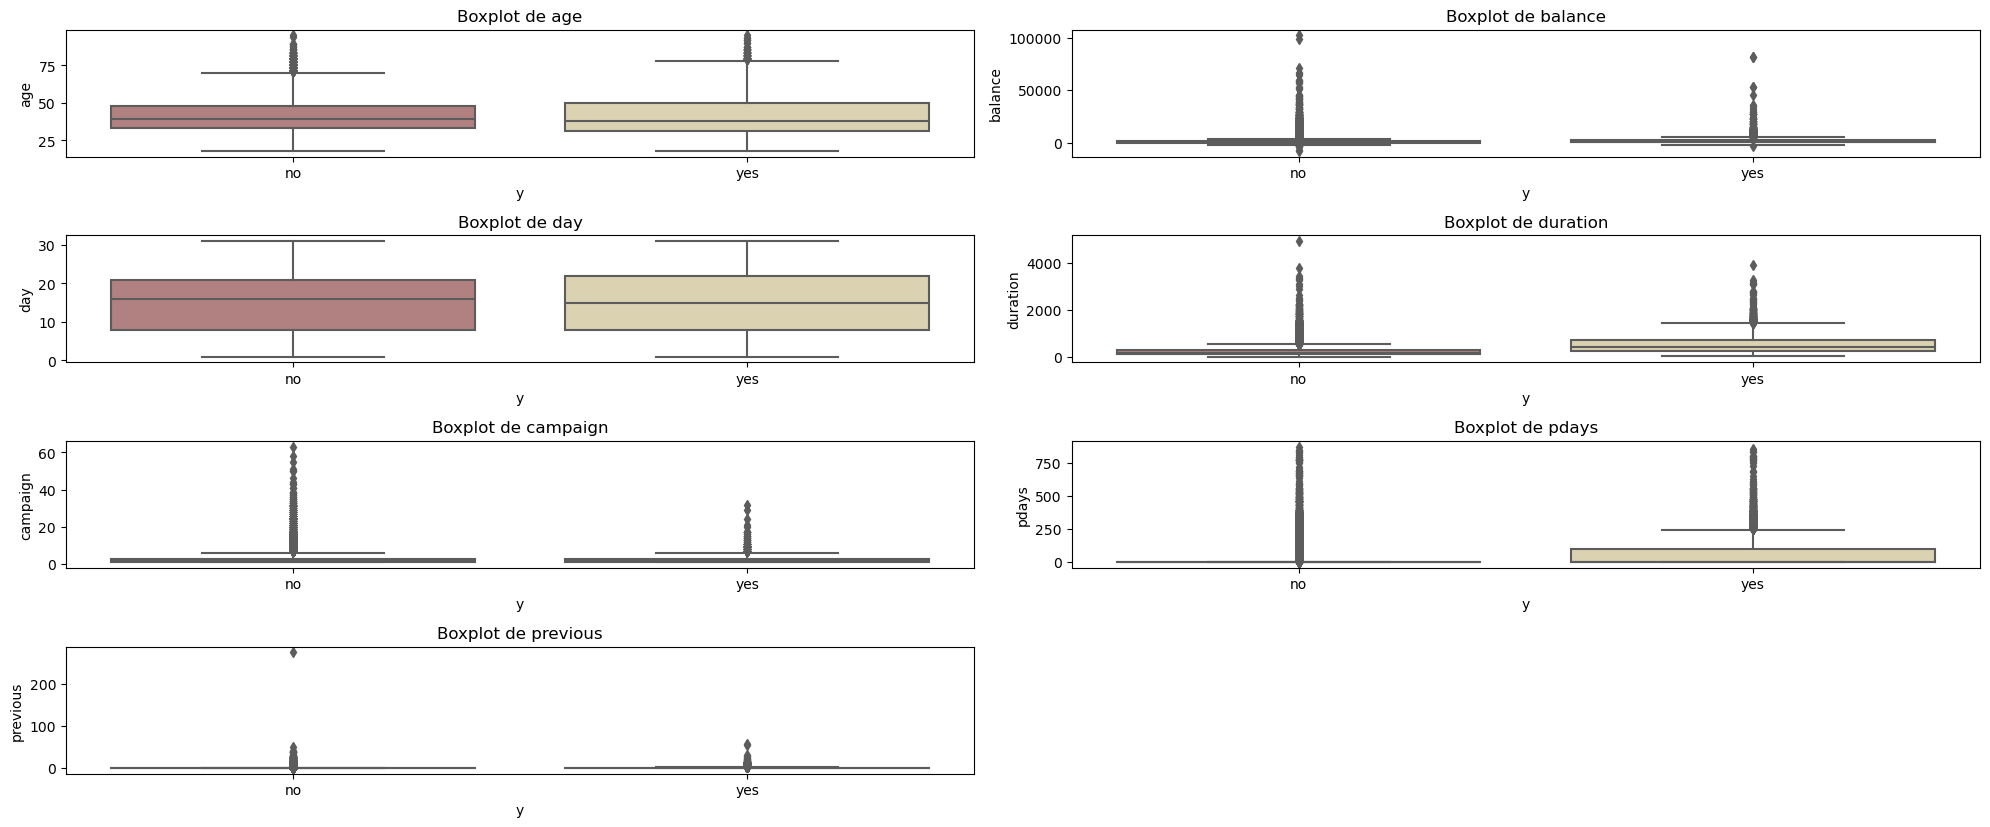

In [16]:
# analise de outliers com boxplot

colunasplot2 = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

categoria = dataTreino['y']
pl.figure(figsize=(20,10))

for i, col in enumerate(colunasplot2, 1):
    pl.subplot(5, 2, i)
    pl.title(f"Boxplot de {col}")
    sns.boxplot(x=categoria, y=dataTreino[col], palette="pink")
    pl.tight_layout()

pl.show()


#### a duração entre o contato com o cliente parece ser muito determinante para o 'sim', mas isso é uma questao de causa e consequencia 

#### observa-se que os clientes com rendas maiores tendem a dizer sim

#### tendencias de que clientes contactados mais vezes tendem a dizer sim

In [17]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

In [18]:
#vamos criar um looping para facilitar

colunasCateg = ['job', 'marital', 'education', 'loan' ,'default', 'housing', 'contact', 'month', 'poutcome', 'y']

for coluna in colunasCateg:
    labelencoder.fit(dataTreino[coluna])
    dataTreino[coluna] = labelencoder.transform(dataTreino[coluna])
    #tambem vou usar no datateste
    dataTeste[coluna] = labelencoder.transform(dataTeste[coluna])
    


#### usei o labelencoder para transformar as variaveis categoricas em numericas, e conseguir analisar outras coisas

<Axes: >

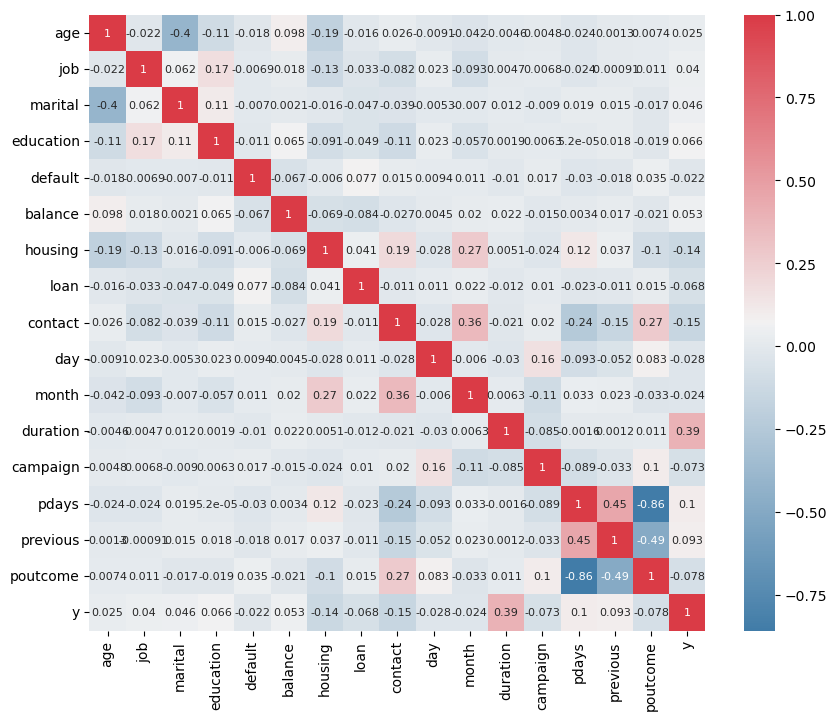

In [19]:
f, ax = pl.subplots(figsize=(10, 8))
corr = dataTreino.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax, annot=True, annot_kws={"fontsize": 8})

#### Este heatmap destaca algumas relações importantes entre as variáveis. No entanto, a maioria das correlações é relativamente fraca

#### sendo assim utilizaremos modelos nao lineares 

### Separando entre teste e Treino X e Y

In [20]:
##separando conjunto de dados
xTreino = dataTreino.drop('y', axis = 1)
yTreino = dataTreino['y']

In [21]:
xTeste = dataTeste.drop('y', axis = 1)
yTeste = dataTeste['y']

In [22]:
linhas_iguais = xTeste.merge(xTreino, how='inner')

if not linhas_iguais.empty:
    print("Os DataFrames têm linhas iguais:")
    print(linhas_iguais)
else:
    print("Os DataFrames não têm linhas iguais.")

    linhas_iguas.shape

Os DataFrames têm linhas iguais:
      age  job  marital  education  default  balance  housing  loan  contact  \
0      30   10        1          0        0     1787        0     0        0   
1      33    7        1          1        0     4789        1     1        0   
2      35    4        2          2        0     1350        1     0        0   
3      30    4        1          2        0     1476        1     1        2   
4      59    1        1          1        0        0        1     0        2   
...   ...  ...      ...        ...      ...      ...      ...   ...      ...   
4516   33    7        1          1        0     -333        1     0        0   
4517   57    6        1          2        1    -3313        1     1        2   
4518   57    9        1          1        0      295        0     0        0   
4519   28    1        1          1        0     1137        0     0        0   
4520   44    2        2          2        0     1136        1     1        0   

      

#### percebi que as linhas de teste estao presentes nas linhas de treino, dessa forma vou usar apenas os dados de Treino e Separar em 4

In [23]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, Y_Treino, Y_teste = train_test_split(xTreino, yTreino, random_state = 17, test_size = 0.2)

## Decision Tree:

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

arvore = DecisionTreeClassifier(max_depth = 3, random_state=17)

In [25]:
arvore.fit(X_treino, Y_Treino)

DecisionTreeClassifier(max_depth=3, random_state=17)

In [26]:
#vizualizar a arvore
# from sklearn.tree import export_graphviz
# export_graphviz(arvore, out_file = 'tree.dot')

In [27]:
previsoes = arvore.predict(X_teste)
previsoes

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
confusao = confusion_matrix(Y_teste, previsoes)
confusao

array([[7756,  199],
       [ 822,  266]], dtype=int64)

In [29]:
taxa_acerto = accuracy_score(Y_teste, previsoes)
taxa_acerto

0.8870949906004645

## Naive Bayes:

In [30]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()

In [31]:
naive_bayes.fit(X_treino, Y_Treino)

GaussianNB()

In [32]:
previsoes2 = naive_bayes.predict(X_teste)
previsoes2

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
confusao2 = confusion_matrix(Y_teste, previsoes2)
confusao2

array([[7056,  899],
       [ 581,  507]], dtype=int64)

In [35]:
taxa_acerto = accuracy_score(Y_teste, previsoes2)
taxa_acerto

0.8363374986177153

## Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

floresta = RandomForestClassifier(n_estimators = 100)

In [37]:
floresta.fit(X_treino, Y_Treino)

RandomForestClassifier()

In [39]:
previsoes3 = floresta.predict(X_teste)
previsoes3

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
confusao3 = confusion_matrix(Y_teste, previsoes3)
confusao3

array([[7710,  245],
       [ 639,  449]], dtype=int64)

In [41]:
taxa_acerto = accuracy_score(Y_teste, previsoes3)
taxa_acerto

0.9022448302554462

### Conclusão: Temos o RandomForest com a maior taxa de acerto entre os modelos testados